# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

C:\Users\legion\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Data Understanding

#### Data loading : The dataset used is a CSV file containing information on the closing price of Microsoft shares (MSFT.csv). The "Date" and "Close" columns are selected and the first rows of data are displayed.

In [38]:
stock = pd.read_csv("MSFT.csv", usecols = ["Date" ,"Close"])
stock.head(10)

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
5,1986-03-20,0.095486
6,1986-03-21,0.092882
7,1986-03-24,0.090278
8,1986-03-25,0.092014
9,1986-03-26,0.094618


In [4]:
stock.sample(5)

,Date,Close
9205,2022-09-20,242.449997
1291,1991-04-22,1.418403
7630,2016-06-17,50.130001
3328,1999-05-13,39.562500
9657,2024-07-10,466.250000


In [5]:
stock.shape

(9690, 2)

In [6]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9690 entries, 0 to 9689
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9690 non-null   object 
 1   Close   9690 non-null   float64
dtypes: float64(1), object(1)
memory usage: 151.5+ KB


In [7]:
stock.describe()

,Close
count,9690.000000
mean,59.075507
std,91.345716
min,0.090278
25%,5.712891
50%,27.360001
75%,46.757499
max,467.559998


In [8]:
stock["Close"].skew()

2.357377169874328

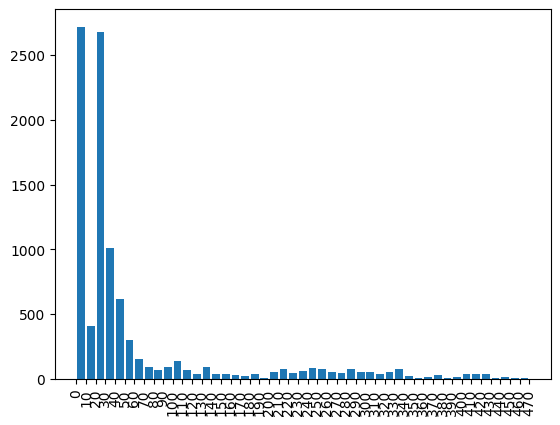

In [9]:
bins = np.arange(0 , stock["Close"].max() + 10 , 10)
plt.hist(data = stock , x = "Close" , bins = bins , rwidth = 0.8)
plt.xticks(bins , rotation = 90);

In [10]:
stock["Date"].max()

'2024-08-23'

In [11]:
stock.isnull().sum()

Date     0
Close    0
dtype: int64

# Data Cleaning and Preprocessing

### Correct Format

In [12]:
stock['Date'] = pd.to_datetime(stock['Date'])
stock.info()
stock.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9690 entries, 0 to 9689
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9690 non-null   datetime64[ns]
 1   Close   9690 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 151.5 KB


,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
5,1986-03-20,0.095486
6,1986-03-21,0.092882
7,1986-03-24,0.090278
8,1986-03-25,0.092014
9,1986-03-26,0.094618


In [13]:
time_interval = (stock["Date"].max() - stock["Date"].min()) / 365
print(time_interval)

38 days 11:22:31.232876712


### Hundle Outliers

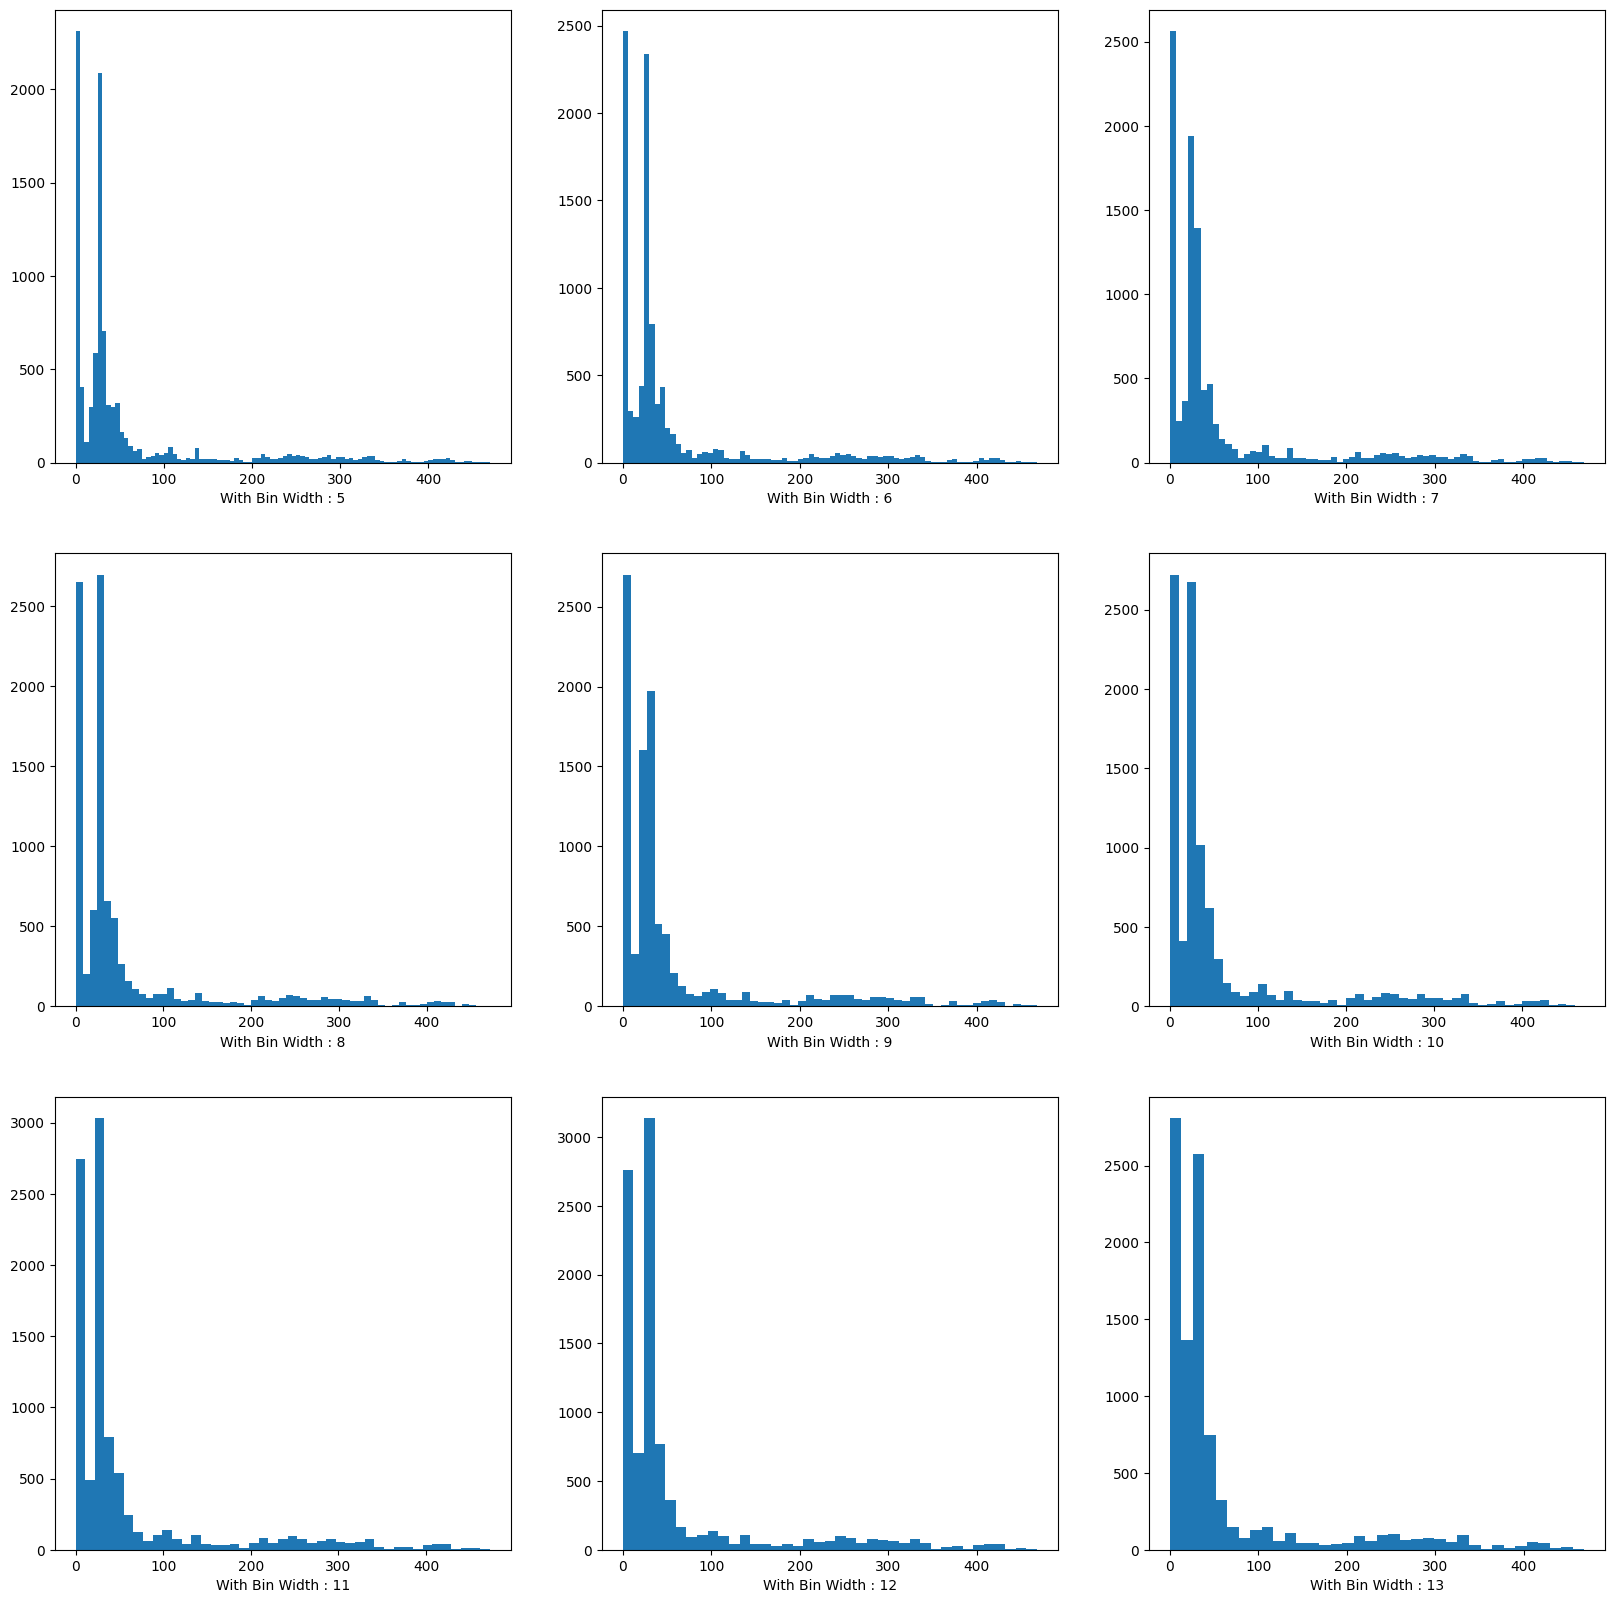

In [14]:
plt.figure(figsize = [20 , 20])

for i in range(9):
    plt.subplot(3 , 3 , i + 1)
    bins = np.arange(0 , stock["Close"].max() + 5 + i , 5 + i)
    plt.hist(data = stock , x = "Close" , bins = bins)
    #plt.xticks(bins , rotation = 90)
    plt.xlabel("With Bin Width : " + str(5 + i))


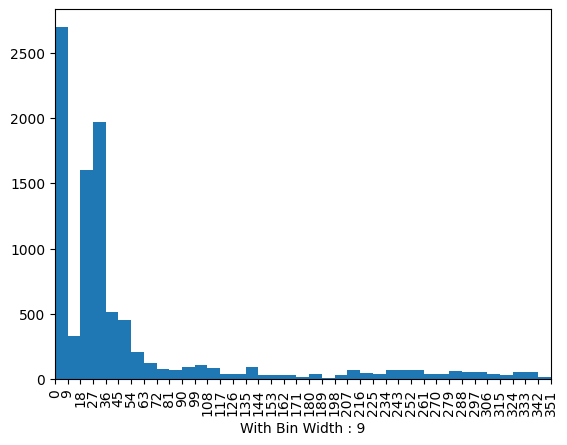

In [15]:
bins = np.arange(0 , stock["Close"].max() + 9 , 9)
plt.hist(data = stock , x = "Close" , bins = bins)
plt.xticks(bins , rotation = 90)
plt.xlabel("With Bin Width : " + str(9))
plt.xlim((0 , 351));

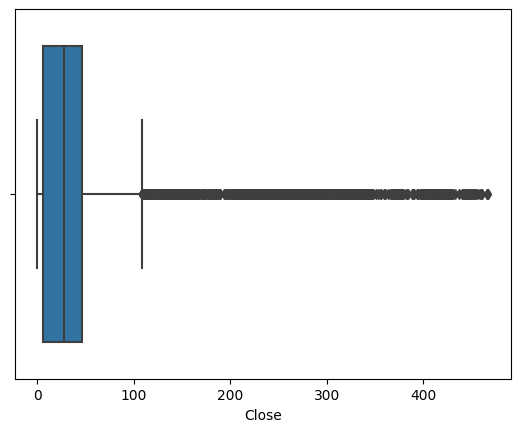

In [16]:
sb.boxplot(x = stock["Close"]);

In [17]:
out_index = stock[stock["Close"] > 351].index
print(len(out_index))
stock = stock.drop(out_index , axis = 0)
stock["Close"].describe()

204


count    9486.000000
mean       51.563295
std        76.341736
min         0.090278
25%         5.476563
50%        27.187500
75%        44.966562
max       350.980011
Name: Close, dtype: float64

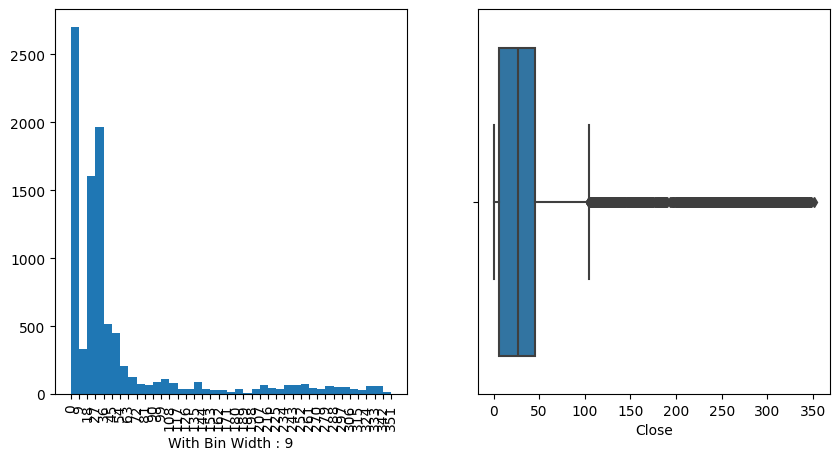

In [18]:
plt.figure(figsize = [10 , 5])

plt.subplot(1 , 2 , 1)
bins = np.arange(0 , stock["Close"].max() + 9 , 9)
plt.hist(data = stock , x = "Close" , bins = bins)
plt.xticks(bins , rotation = 90)
plt.xlabel("With Bin Width : " + str(9))

plt.subplot(1 , 2 , 2)
sb.boxplot(x = stock["Close"]);

In [19]:
stock = stock.set_index("Date")

# Data Exploration (EDA)

In [20]:
stock.head(10)

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
1986-03-20,0.095486
1986-03-21,0.092882
1986-03-24,0.090278
1986-03-25,0.092014


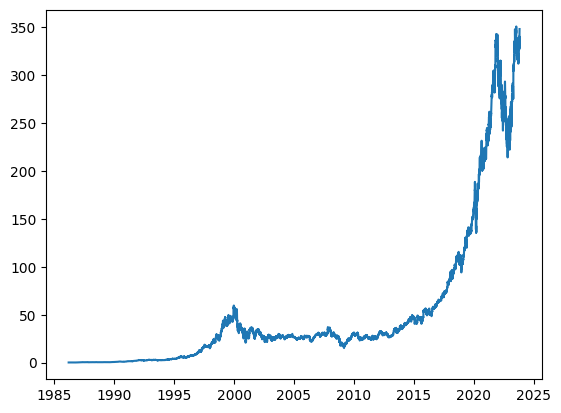

In [21]:
plt.plot(stock.index , stock["Close"]);

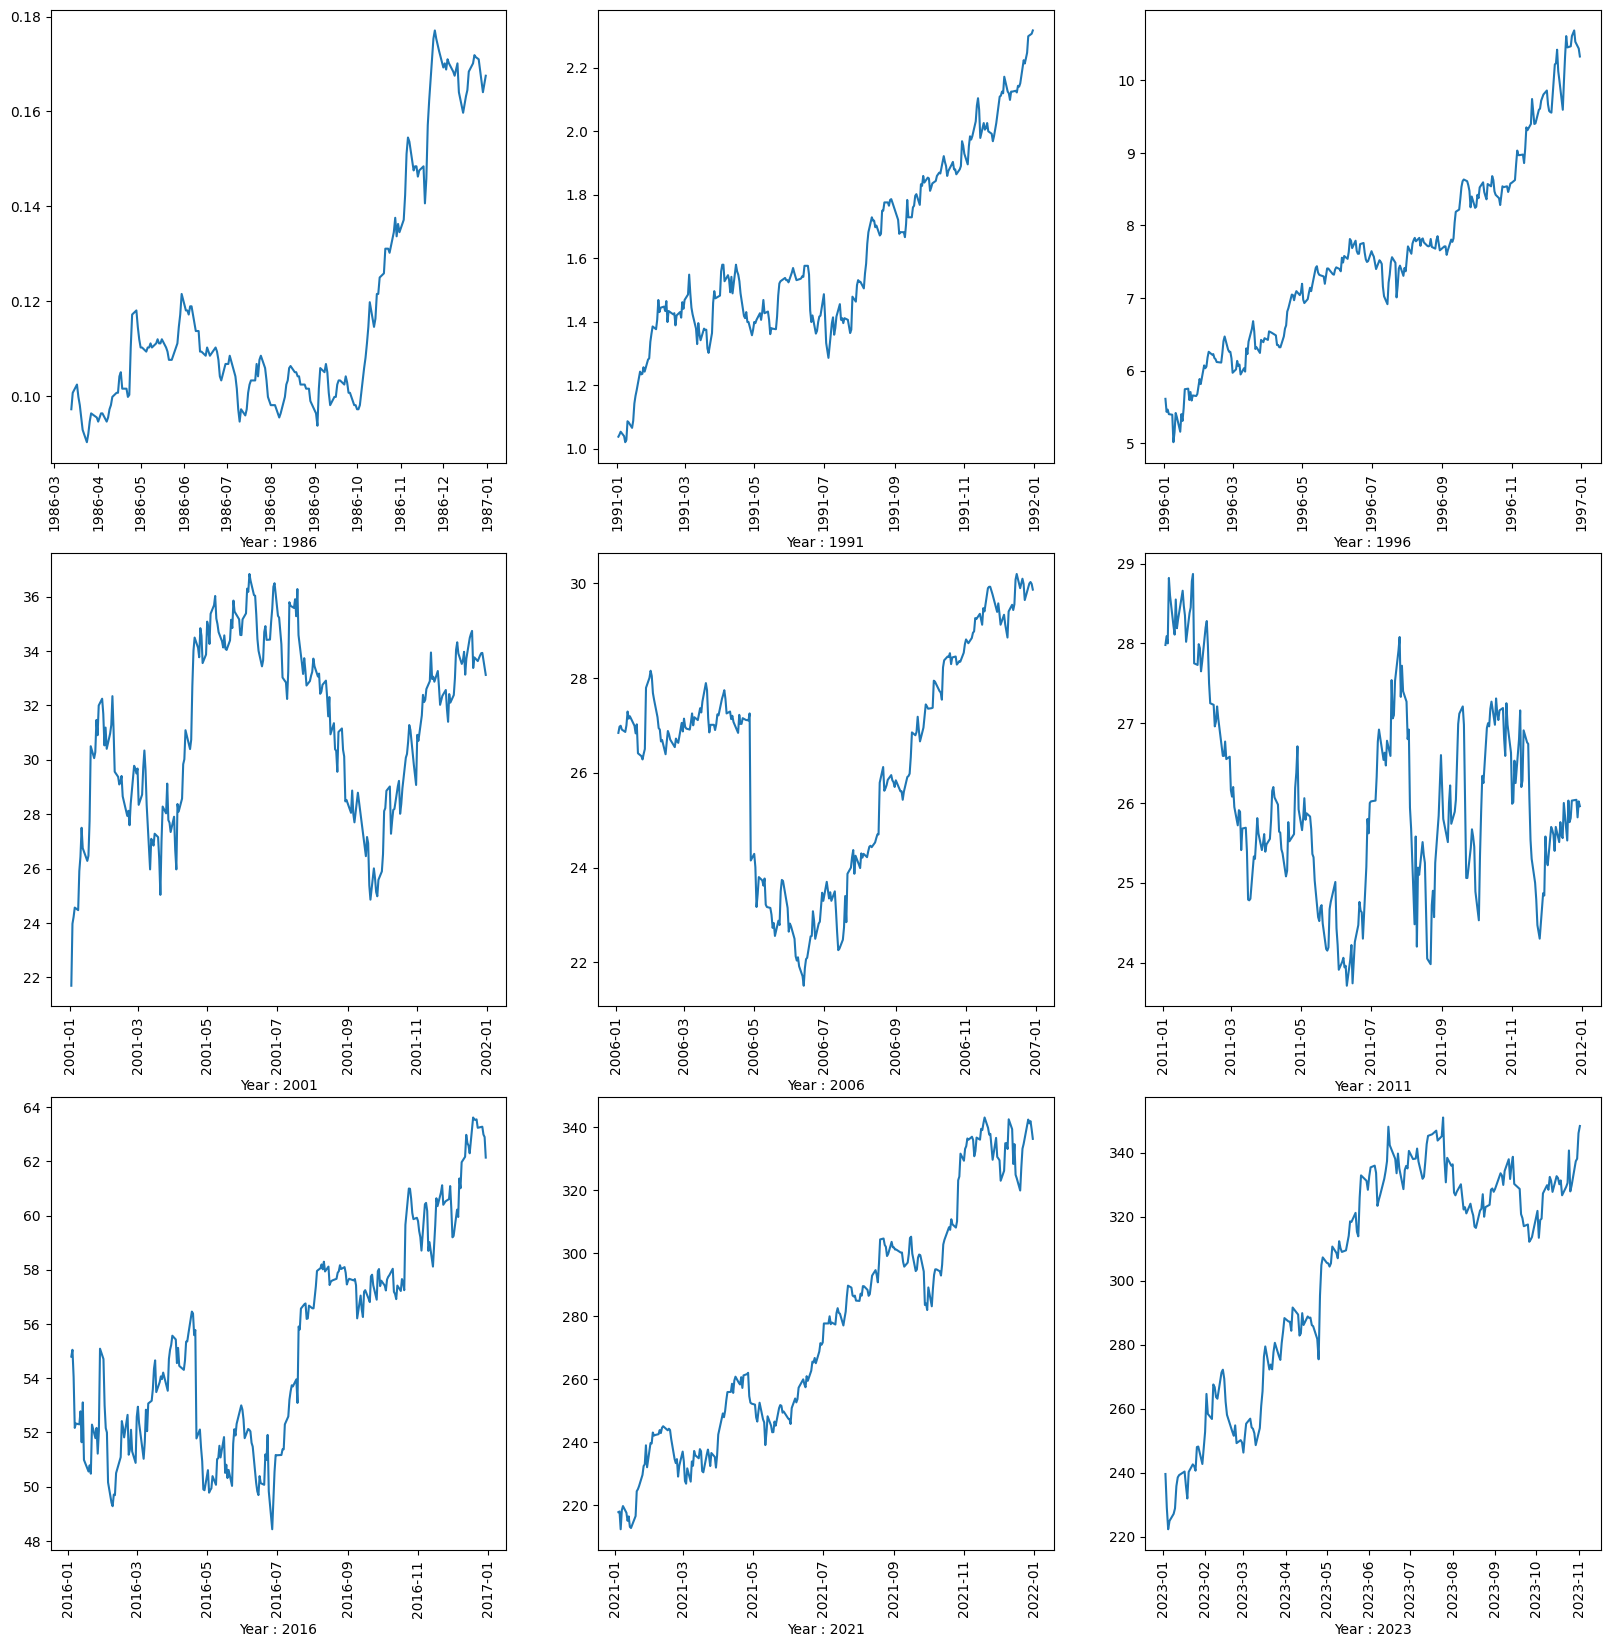

In [22]:
plt.figure(figsize = [20 , 20])

first = 1981
for i in range(9):
    plt.subplot(3 , 3 , i + 1)
    first += 5
    if first == 2026:
        first = 2023
        stock_year = stock[stock.index.year == first]
    else:
        stock_year = stock[stock.index.year == first]
    plt.plot(stock_year.index , stock_year["Close"]) 
    plt.xlabel("Year : " + str(first))
    plt.xticks(rotation = 90);

# LSTM

In [23]:
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

In [24]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(stock, 
                                '2021-03-25', 
                                '2022-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
247,2022-03-17,276.440002,287.149994,294.390015,295.220001
248,2022-03-18,287.149994,294.390015,295.220001,300.429993
249,2022-03-21,294.390015,295.220001,300.429993,299.160004
250,2022-03-22,295.220001,300.429993,299.160004,304.059998


In [25]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

### Spliting Data

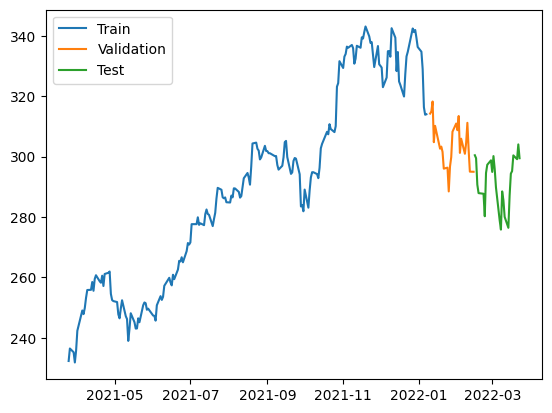

In [26]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

### Model Building

In [39]:
model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 83832.0938 - mean_absolute_error: 287.8372 - val_loss: 92293.9062 - val_mean_absolute_error: 303.7119
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 83515.6406 - mean_absolute_error: 287.2864 - val_loss: 91957.3438 - val_mean_absolute_error: 303.1573
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 83185.4297 - mean_absolute_error: 286.7109 - val_loss: 91533.4219 - val_mean_absolute_error: 302.4573
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 82755.7188 - mean_absolute_error: 285.9616 - val_loss: 90989.5469 - val_mean_absolute_error: 301.5569
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 82212.8828 - mean_absolute_error: 285.0112 - val_loss: 90289.2734 - val_mean_absolute_error: 300.3935
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 81479.6875 - mean_absolute_error: 283.7212 - val_loss: 89240.3672 - val_mean_absolute_error: 298.6425
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/s

Epoch 44/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 982.4222 - mean_absolute_error: 26.6233 - val_loss: 268.9977 - val_mean_absolute_error: 14.7834
Epoch 45/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 978.0866 - mean_absolute_error: 26.5600 - val_loss: 300.2261 - val_mean_absolute_error: 15.7583
Epoch 46/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 951.6837 - mean_absolute_error: 26.2359 - val_loss: 323.8140 - val_mean_absolute_error: 16.5188
Epoch 47/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 923.5732 - mean_absolute_error: 25.8503 - val_loss: 269.1139 - val_mean_absolute_error: 14.8231
Epoch 48/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 895.6829 - mean_absolute_error: 25.4269 - val_loss: 321.1848 - val_mean_absolute_error: 16.5257
Epoch 49/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 815.5748 - mean_absolute_error: 24.3154 - val_loss: 349.4812 - val_mean_absolute_error: 17.4010
Epoch 50/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 757.6943 - mea

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 25.5636 - mean_absolute_error: 3.9213 - val_loss: 58.6200 - val_mean_absolute_error: 5.9684
Epoch 89/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 24.8079 - mean_absolute_error: 3.8695 - val_loss: 58.9535 - val_mean_absolute_error: 5.9859
Epoch 90/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 24.0949 - mean_absolute_error: 3.8172 - val_loss: 59.1726 - val_mean_absolute_error: 5.9982
Epoch 91/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.4620 - mean_absolute_error: 3.7707 - val_loss: 59.3026 - val_mean_absolute_error: 6.0062
Epoch 92/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 22.8958 - mean_absolute_error: 3.7271 - val_loss: 59.5318 - val_mean_absolute_error: 6.0181
Epoch 93/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.4204 - mean_absolute_error: 3.6900 - val_loss: 59.7768 - val_mean_absolute_error: 6.0355
Epoch 94/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 21.9971 - mean_absolute_error: 3.6581 - val_loss: 59.7

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


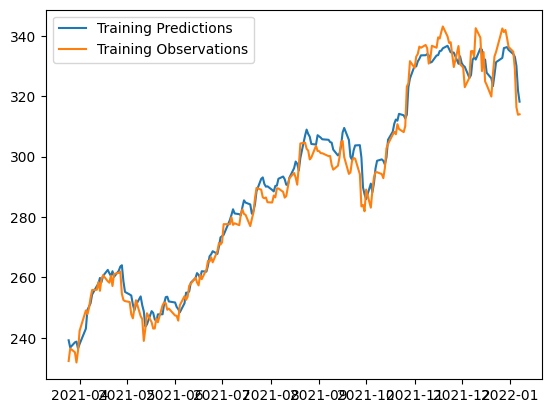

In [45]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


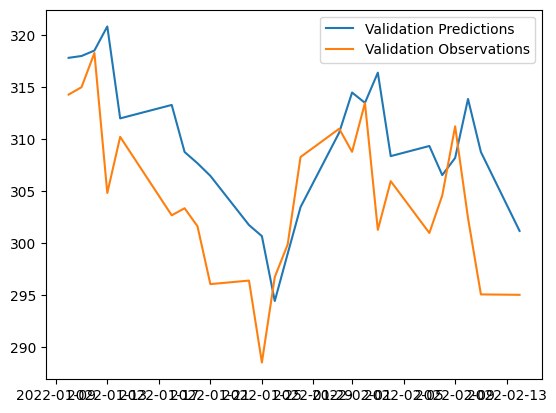

In [46]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


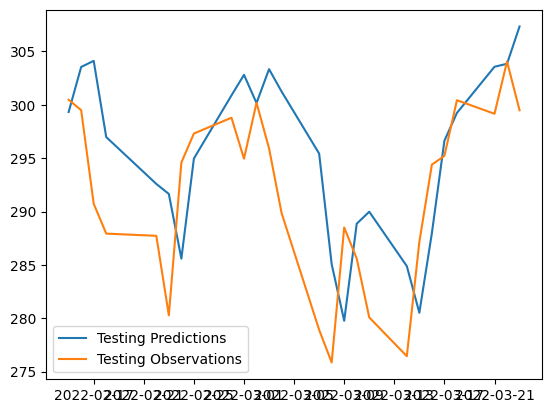

In [47]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

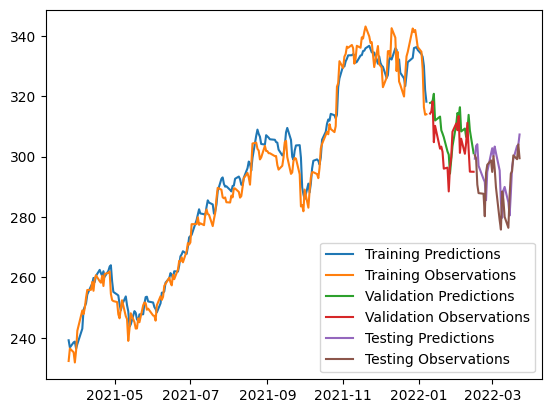

In [48]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [31]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

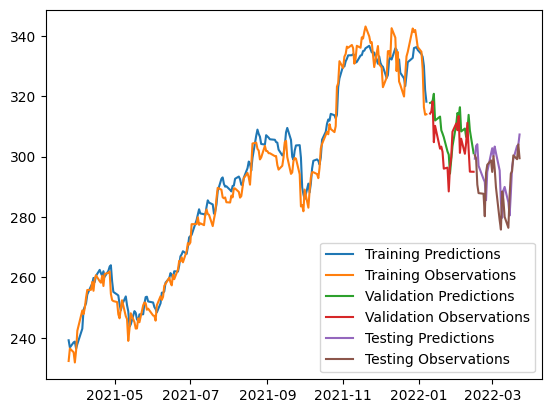

In [49]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])